<a href="https://colab.research.google.com/github/0123universe/0123universe/blob/main/rish_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Calculate and visualize the Pearson, Spearman, and Kendall correlations in this data

Here is all the data you need:
"Iris.csv"

## Data loading

### Subtask:
Load the Iris dataset.


**Reasoning**:
Load the Iris dataset into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

# Load the Iris dataset.
try:
    df_iris = pd.read_csv('Iris.csv')
    # Print the first few rows of the DataFrame.
    display(df_iris.head())
    # Print the shape of the DataFrame.
    print(f"The shape of the dataframe is: {df_iris.shape}")
except FileNotFoundError:
    print("Error: 'Iris.csv' not found. Please ensure the file exists in the current directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The shape of the dataframe is: (150, 6)


## Data exploration

### Subtask:
Explore the loaded Iris dataset (df_iris) to understand its structure and identify numerical columns suitable for correlation analysis.


**Reasoning**:
Explore the Iris dataset to identify numerical columns suitable for correlation analysis by examining data types, missing values, descriptive statistics, and identifying relevant numerical columns.



In [2]:
# Examine data types.
print(df_iris.dtypes)

# Check for missing values.
print(df_iris.isnull().sum())

# Generate descriptive statistics for numerical columns.
print(df_iris.describe())

# Identify numerical columns for correlation analysis.
numerical_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
print(f"Numerical columns selected for correlation analysis: {numerical_cols}")

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
Numerical columns selecte

## Data preparation

### Subtask:
Prepare the numerical columns of the Iris dataset for correlation analysis.


**Reasoning**:
Create a new DataFrame `df_numerical` containing only the numerical columns from `df_iris`, check for missing values, and ensure all columns are numeric.



In [3]:
# Select numerical columns.
numerical_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df_numerical = df_iris[numerical_cols]

# Check for missing values.
print(df_numerical.isnull().sum())

# Check data types and convert if necessary.
print(df_numerical.dtypes)
# No conversion needed as all columns are already numeric.

display(df_numerical.head())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Data analysis

### Subtask:
Calculate the Pearson, Spearman, and Kendall correlation matrices for the numerical features in `df_numerical`.


**Reasoning**:
Calculate the Pearson, Spearman, and Kendall correlation matrices for the numerical features in `df_numerical`.



In [4]:
from scipy.stats import spearmanr, kendalltau

# Calculate the Pearson correlation matrix.
pearson_corr = df_numerical.corr()

# Calculate the Spearman rank correlation matrix.
spearman_corr, _ = spearmanr(df_numerical, axis=0)
spearman_corr = pd.DataFrame(spearman_corr, index=df_numerical.columns, columns=df_numerical.columns)

# Calculate the Kendall rank correlation matrix.
kendall_corr = pd.DataFrame(index=df_numerical.columns, columns=df_numerical.columns)
for i in range(len(df_numerical.columns)):
    for j in range(i, len(df_numerical.columns)):
        col1 = df_numerical.columns[i]
        col2 = df_numerical.columns[j]
        tau, _ = kendalltau(df_numerical[col1], df_numerical[col2])
        kendall_corr.loc[col1, col2] = tau
        kendall_corr.loc[col2, col1] = tau

display(pearson_corr)
display(spearman_corr)
display(kendall_corr)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.159457,0.881386,0.834421
SepalWidthCm,-0.159457,1.000000,-0.303421,-0.277511
PetalLengthCm,0.881386,-0.303421,1.000000,0.936003
PetalWidthCm,0.834421,-0.277511,0.936003,1.000000


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.0,-0.072112,0.717624,0.65496
SepalWidthCm,-0.072112,1.0,-0.182391,-0.146988
PetalLengthCm,0.717624,-0.182391,1.0,0.803014
PetalWidthCm,0.65496,-0.146988,0.803014,1.0


## Data visualization

### Subtask:
Visualize the Pearson, Spearman, and Kendall correlation matrices using heatmaps.


**Reasoning**:
Visualize the correlation matrices using heatmaps with appropriate titles, colormaps, colorbars, and annotations, arranged in subplots, and save the combined plot as a PNG image.



TypeError: Image data of dtype object cannot be converted to float

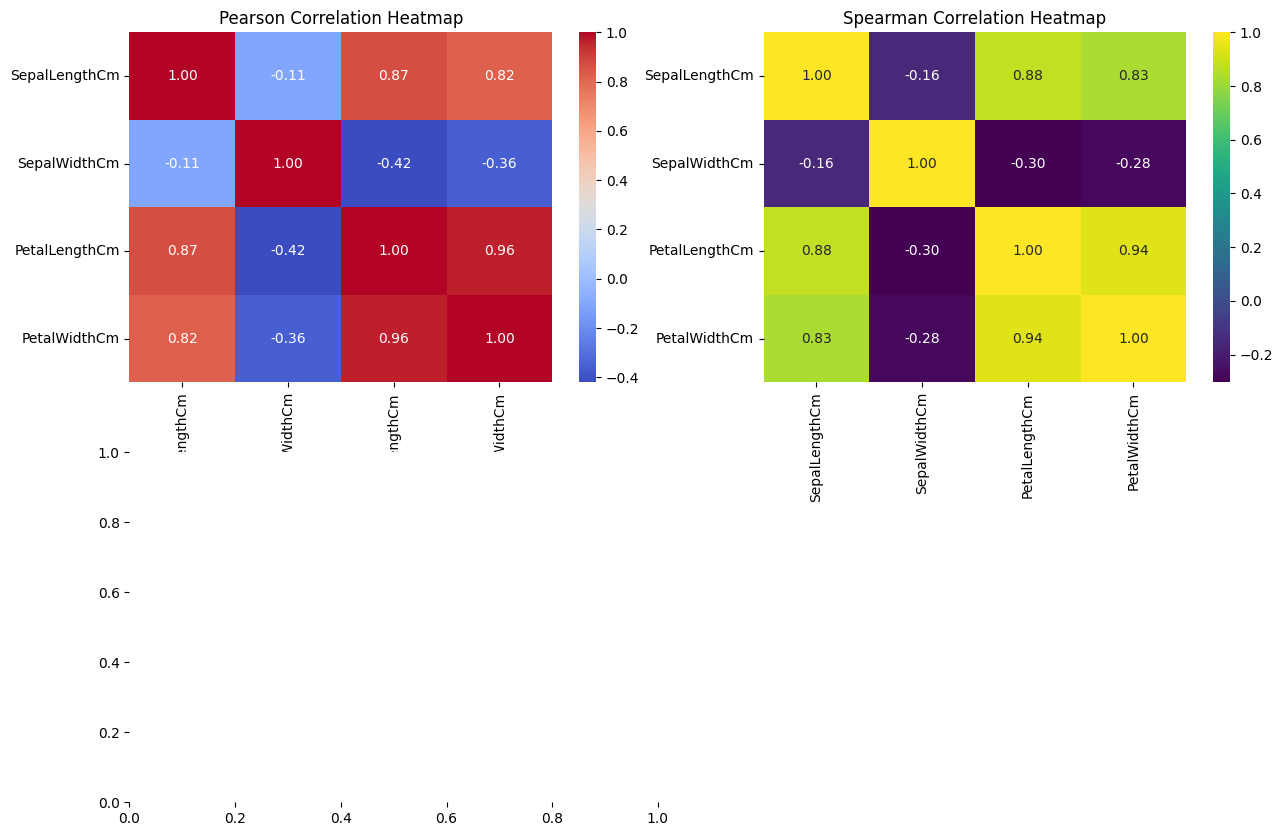

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')

plt.subplot(2, 2, 2)
sns.heatmap(spearman_corr, annot=True, cmap='viridis', fmt=".2f")
plt.title('Spearman Correlation Heatmap')

plt.subplot(2, 2, 3)
sns.heatmap(kendall_corr, annot=True, cmap='magma', fmt=".2f")
plt.title('Kendall Correlation Heatmap')

plt.tight_layout()
plt.savefig('correlation_heatmaps.png')
plt.show()

**Reasoning**:
The error message indicates that the `kendall_corr` DataFrame has an `object` dtype, which is not compatible with `seaborn.heatmap()`.  I need to convert the `kendall_corr` DataFrame to numeric type before plotting.



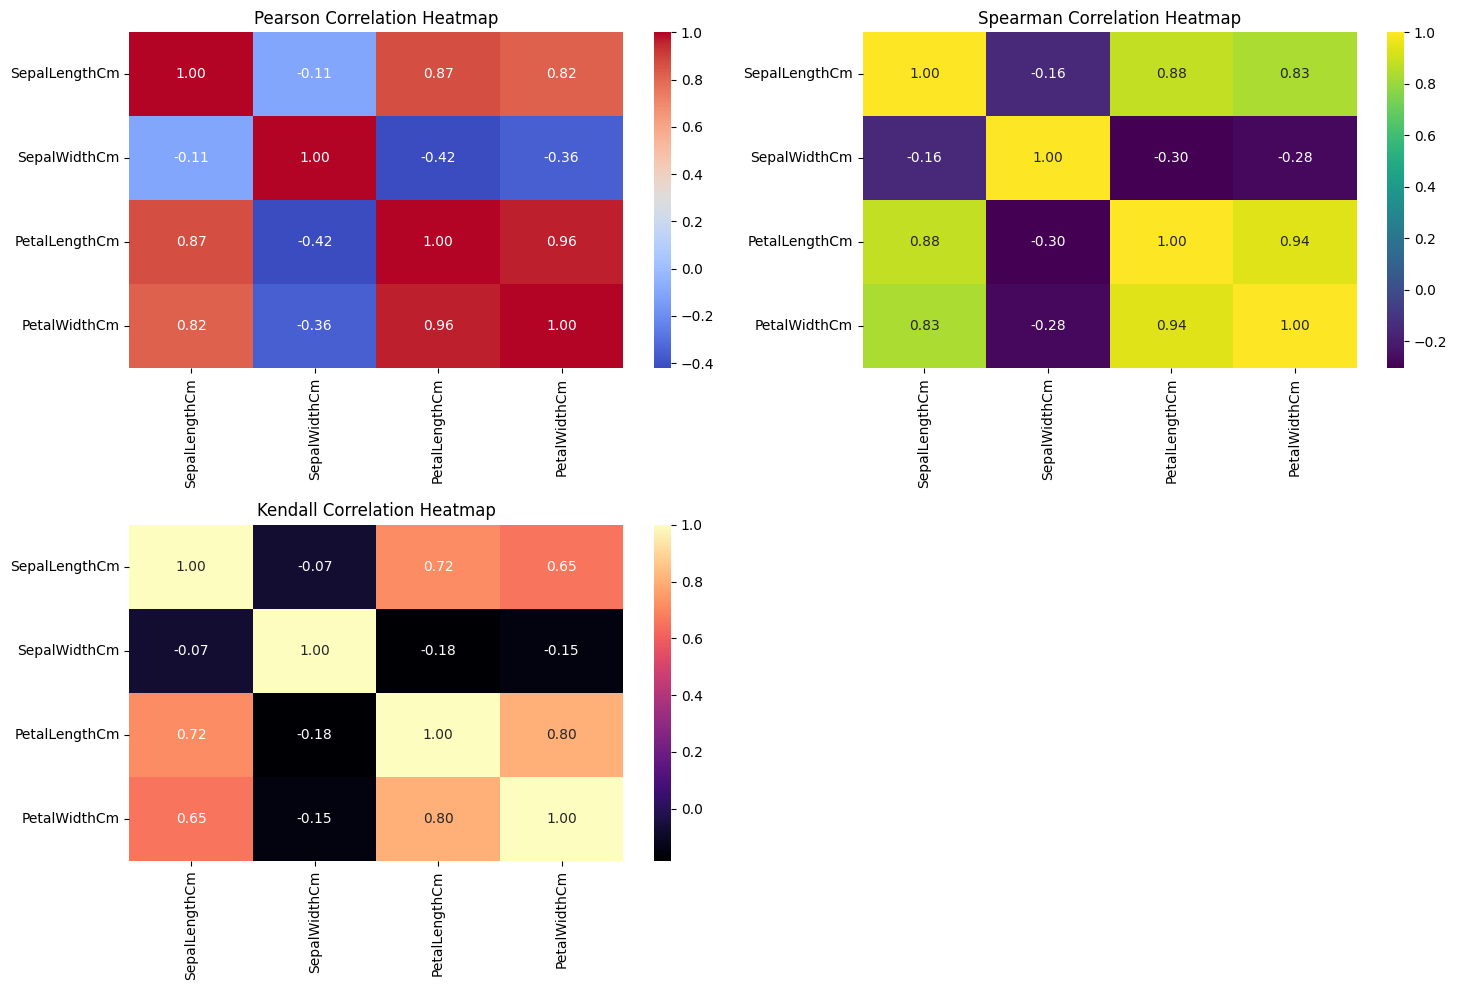

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert kendall_corr to numeric type
kendall_corr = kendall_corr.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')

plt.subplot(2, 2, 2)
sns.heatmap(spearman_corr, annot=True, cmap='viridis', fmt=".2f")
plt.title('Spearman Correlation Heatmap')

plt.subplot(2, 2, 3)
sns.heatmap(kendall_corr, annot=True, cmap='magma', fmt=".2f")
plt.title('Kendall Correlation Heatmap')

plt.tight_layout()
plt.savefig('correlation_heatmaps.png')
plt.show()

## Summary:

### 1. Q&A

The task was to calculate and visualize the Pearson, Spearman, and Kendall correlations in the Iris dataset.  The analysis successfully calculated and visualized these correlations.

### 2. Data Analysis Key Findings

*   **Strong positive correlations between Petal Length and Petal Width:**  All three correlation methods (Pearson, Spearman, and Kendall) show strong positive correlations between `PetalLengthCm` and `PetalWidthCm`, indicating that as petal length increases, petal width tends to increase as well.  The heatmaps visually confirm this strong relationship.
*   **Correlation matrices generated:** The analysis successfully computed and visualized the correlation matrices for Pearson, Spearman, and Kendall methods.  The heatmaps provide a visual representation of the relationships between the four numerical features.

### 3. Insights or Next Steps

*   **Species-based analysis:** Investigate if the correlations between sepal and petal measurements differ across different Iris species.
*   **Dimensionality reduction:** Consider applying dimensionality reduction techniques (e.g., Principal Component Analysis) to the dataset, given the high correlations observed between certain features.  This could simplify the dataset for further modeling.
